In [3]:
import numpy as np
import pandas as pd

In [4]:
fake_df = pd.read_csv('archive/Fake.csv')
true_df = pd.read_csv('archive/True.csv')

In [26]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [27]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [28]:
true_df.isnull().values.any()
fake_df.isnull().values.any()

False

In [5]:
true_df['target'] = 1
fake_df['target'] = 0

In [20]:
df = pd.concat([true_df, fake_df], ignore_index=True, sort=False)

In [21]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [26]:
import sklearn
import seaborn as sns    
#df = df.sample(frac=1).reset_index(drop=True)
df = sklearn.utils.shuffle(df)
mat.figure(figsize= (20, 10))
sns.heatmap(df.corr(),annot= True)
df.head()

NameError: name 'mat' is not defined

In [28]:
totalLen = len(df['target'])
totalTrueVal = len(df[df['target'] == 1])
totalFalseVal = len(df[df['target'] == 0])
print(totalTrueVal, totalFalseVal)
labels = 'True', 'False'
sizes = [totalTrueVal * 100/totalLen, totalFalseVal* 100/totalLen]

21417 23481


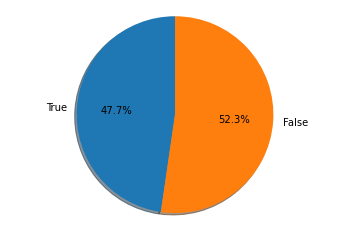

In [34]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
df.isnull().values.any()

False

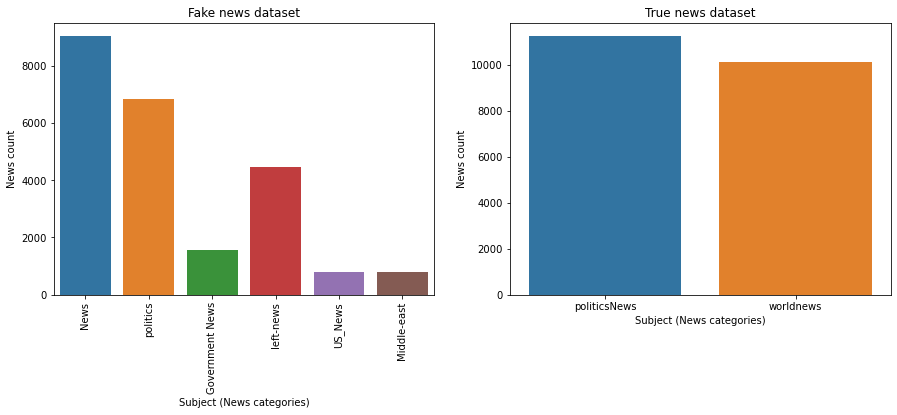

In [58]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
import seaborn as sns

plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
sns.countplot('subject', data=fake_df)
plt.xticks(rotation=90)
plt.ylabel('News count')
plt.xlabel('Subject (News categories)')
plt.title('Fake news dataset')


plt.subplot(1, 2, 2)
sns.countplot('subject', data=true_df)
plt.ylabel('News count')
plt.xlabel('Subject (News categories)')
plt.title('True news dataset')
plt.show()

In [72]:
import re
import string

samp = df.sample(1)
text = samp.iloc[0]['text']
print (text)
text = re.sub(r'\d+','',text)
print ('Sentence After removing numbers\n',text)

text = text.translate(sentence.maketrans("","",string.punctuation))
print ('Sentence After Removing Punctuations\n',text)

WASHINGTON (Reuters) - U.S. Attorney General Jeff Sessions said on Thursday he would stay out of any probe into alleged Russian meddling in the 2016 presidential election but maintained he did nothing wrong by failing to disclose he met last year with Russia’s ambassador. Sessions, a longtime U.S. senator who was an early and high-ranking player in President Donald Trump’s campaign before becoming the country’s top law enforcement official, announced the decision after several fellow Republicans in Congress suggested the move would be appropriate. “I have recused myself in the matters that deal with the Trump campaign,” Sessions told reporters at a hastily arranged news conference. Sessions said he had been weighing recusal - ruling himself out from any role in the investigations - even before the latest twist of the controversy over ties between Trump associates and Russia that has dogged the early days of the Trump presidency. The president backed Sessions, saying Democrats had polit

In [9]:
import re
import string

samp = df.sample(1)
text = samp.iloc[0]['text']
print ('Sentence before removing numbers\n',text)
text = text.split()
text = [stemmer.stem(word) for word in text if not word in stopwords.words('english')]
print ('Sentence After removing numbers\n',text)

Sentence before removing numbers
 Some people believe that Trump is  journaling  his thoughts by posting on Twitter. He s being transparent, they say.What these people fail to realize is, maybe sharing his thoughts to the entire world isn t the best idea.Or, maybe it is a good idea. We get to really see what kind of man Trump is while he shoots himself in the foot.According to Fortune, Donald Trump s tweets about his  travel ban  helped convince an appeals court to block the controversial plan once again. It s the second time his own comments have helped the courts knock down the executive order.The 9th Circuit Court of Appeals came to a decision on Monday, ruling that Trump s attempt to block immigration from six predominantly Muslim countries  exceeded the scope of the authority delegated to him by Congress. In their ruling, the judges cited a tweet from the President that was posted after the recent terrorist attack in London. In this tweet, Trump stated that the U.S. needed a trave

NameError: name 'stopwords' is not defined

In [73]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
words_in_text = list(set(text.split(' ')) - stop_words)
print (words_in_text)

['', 'past', 'inadequate', 'Moscow', 'Today', 'move', 'New', 'dogged', 'Ukraine', 'simply', 'misled', 'hearing', 'hunt”', 'quell', 'repealing', 'case', 'backed', '“target”', 'discussed', 'fellow', 'policy', 'national', 'Jared', 'correct”', 'general', '“subjects”', 'Moscow’s', 'latest', 'Trump’s', 'adding', 'Russian', 'allegations', 'USA', 'York', 'credible”', 'role', 'several', 'month', 'deeply', 'issues', 'Michael', 'concerns', 'communication', 'In', 'convention', 'campaign”', 'enforcement', 'suggested', 'seems', 'top', 'disclosed', 'leader', 'disclosure', 'never', 'said', 'well', 'National', 'least', 'deal', 'emails', 'matters', 'recused', 'foreign', 'political', 'twist', 'Sessions’', 'country’s', 'intentional”', 'independent', 'Mike', 'The', 'meddling', 'investigating', 'position', 'longtime', 'conversations', 'member', 'He', 'law', 'whether', 'take', 'Foundation', 'resign', 'Security', 'defensive', 'early', '“total', 'improved', 'Schiff', 'launch', 'weighing', 'healthcare', 'down”'

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')
pstemmer= PorterStemmer()
for i,word in enumerate(words_in_text):
    words_in_text[i] = pstemmer.stem(word)
print (words_in_text)    

#Lemmatization of Words
#Lemmatisation is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Ex: dogs -> dog. I am not clear with difference between lemmatization and stemming. In most of the tutorials, I found them both and I could not understand the clear difference between the two.

from nltk.stem import WordNetLemmatizer
nlemmatizer=WordNetLemmatizer()
words = []
for i,word in enumerate(words_in_text):
    words_in_text[i] = nlemmatizer.lemmatize(word)
print (words_in_text)

[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['', 'past', 'inadequ', 'moscow', 'today', 'move', 'new', 'dog', 'ukrain', 'simpli', 'misl', 'hear', 'hunt”', 'quell', 'repeal', 'case', 'back', '“target”', 'discu', 'fellow', 'polici', 'nation', 'jare', 'correct”', 'gener', '“subjects”', 'moscow’', 'latest', 'trump’', 'ad', 'russian', 'alleg', 'usa', 'york', 'credible”', 'role', 'sever', 'month', 'deepli', 'issu', 'michael', 'concern', 'commun', 'in', 'convent', 'campaign”', 'enforc', 'suggest', 'seem', 'top', 'disclo', 'leader', 'disclosur', 'never', 'said', 'well', 'nation', 'least', 'deal', 'email', 'matter', 'recu', 'foreign', 'polit', 'twist', 'sessions’', 'country’', 'intentional”', 'independ', 'mike', 'the', 'meddl', 'investig', 'posit', 'longtim', 'conver', 'member', 'he', 'law', 'whether', 'take', 'foundat', 'resign', 'secur', 'defen', 'earli', '“total', 'improv', 'schiff', 'launch', 'weigh', 'healthcar', 'down”', 'enthusiasm', 'includ', 'septemb', 'accu', 'servic', 'would', 'meet', 'democrat', 'told', 'accur', 'slow', 'attor

In [77]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [78]:
word_count = {}
word_count_true = {}
word_count_false = {}
true  = 0
false = 0 

import re
import string
import nltk
stop_words = set(nltk.corpus.stopwords.words('english'))
from nltk.stem import PorterStemmer
pstemmer= PorterStemmer()
from nltk.stem import WordNetLemmatizer
wnlemmatizer=WordNetLemmatizer()

In [82]:
row_count = train.shape[0]
for row in range(0,row_count):
    true += train.iloc[row]['target']
    false += (1 - train.iloc[row]['target'])
    text = train.iloc[row]['text']
    text = re.sub(r'\d+','',text)
    text = text.translate(sentence.maketrans("","",string.punctuation))
    words_in_text = list(set(text.split(' ')) - stop_words)
    for index,word in enumerate(words_in_text):
        word = pstemmer.stem(word)
        words_in_text[index] = wnlemmatizer.lemmatize(word)
    for word in words_in_text:
        if train.iloc[row]['target'] == 0:   #fake 
            if word in word_count_false.keys():
                word_count_false[word]+=1
            else:
                word_count_false[word] = 1
        elif train.iloc[row]['target'] == 1: #truth 
            if word in word_count_true.keys():
                word_count_true[word]+=1
            else:
                word_count_true[word] = 1
        if word in word_count.keys():        #For all words. I use this to compute probability.
            word_count[word]+=1
        else:
            word_count[word]=1

print('Done')

Done


In [83]:
word_probability = {}
total_words = 0
for i in word_count:
    total_words += word_count[i]
for i in word_count:
    word_probability[i] = word_count[i] / total_words

#Eliminating words which are insignificant. Insignificant words are words which have a probability of occurence less than 0.0001.
print ('Total words ',len(word_probability))
print ('Minimum probability ',min (word_probability.values()))
threshold_p = 0.0001
for i in list(word_probability):
    if word_probability[i] < threshold_p:
        del word_probability[i]
        if i in list(word_count_false):   #list(dict) return it;s key elements
            del word_count_false[i]
        if i in list(word_count_true):  
            del word_count_true[i]
print ('Total words ',len(word_probability))

Total words  180205
Minimum probability  1.5935267120492452e-07
Total words  1811


In [88]:
total_fake_words = sum(word_count_false.values())
cp_false = {}  #Conditional Probability
for i in list(word_count_false):
    cp_false[i] = word_count_false[i] / total_fake_words

total_true_words = sum(word_count_true.values())
cp_true = {}  #Conditional Probability
for i in list(word_count_true):
    cp_true[i] = word_count_true[i] / total_true_words

In [89]:
row_count = test.shape[0]

p_true = true / (false + true)
p_false = false / (false + true)
accuracy = 0

for row in range(0, row_count):
    text = test.iloc[row]['text']
    target = test.iloc[row]['target']
    text = re.sub(r'\d+', '', text)
    text = text.translate(text.maketrans("", "", string.punctuation))
    words_in_text = list(set(text.split(' ')) - stop_words)
    for index, word in enumerate(words_in_text):
        word = pstemmer.stem(word)
        words_in_text[index] = wnlemmatizer.lemmatize(word)
    true_term = p_true
    false_term = p_false

    false_M = len(cp_false.keys())
    true_M = len(cp_true.keys())
    for word in words_in_text:
        if word not in cp_true.keys():
            true_M += 1
        if word not in cp_false.keys():
            false_M += 1

    for word in words_in_text:
        if word in cp_true.keys():
            true_term *= (cp_true[word] + (1 / true_M))
        else:
            true_term *= (1 / true_M)
        if word in cp_false.keys():
            false_term *= (cp_false[word] + (1 / false_M))
        else:
            false_term *= (1 / false_M)

    if true_term / (true_term + false_term) > 0.5:
        response = 1
    else:
        response = 0
    if target == response:
        accuracy += 1

print('Accuracy is ', accuracy / row_count * 100)

/var/folders/cz/mf6k7s456v95hf4y3g4lyfz40000gn/T/ipykernel_36166/907332152.py:37: RuntimeWarning: invalid value encountered in double_scalars
  if true_term / (true_term + false_term) > 0.5:


Accuracy is  67.37193763919822
